# **Twitter Sentiment Analysis Using Gradient Boosting**
This project focuses on building a classifier for sentiment analysis using a gradient boosting classifier.

## **Load Dataset**

In [81]:
import pandas as pd

df = pd.read_csv('../data/Tweets.csv')
print(df.head())

  sentiment                                              tweet
0   neutral  Happy Monday tweeples... hope it wasn`t to har...
1  negative  I can`t believe I thought I had a morning shif...
2   neutral  So its Superstar Sunday?  is one superstar I k...
3  positive   yay i hit 50 subscribers on youtube. go me  lol.
4   neutral                               Today = marking *135


## **Data Visualization**

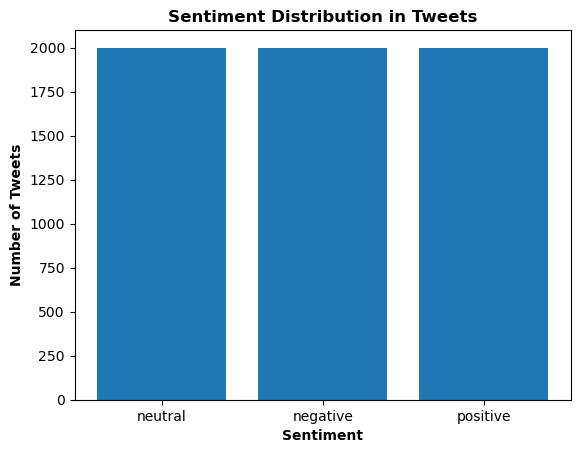

In [82]:
import matplotlib.pyplot as plt

# Visualize sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution in Tweets', fontweight='bold')
plt.xlabel('Sentiment', fontweight='bold')
plt.ylabel('Number of Tweets', fontweight='bold')
plt.show()

## **Create Feature Vectors**

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')      # vectorizer has built-in data cleaning
X = vectorizer.fit_transform(df['tweet'])
y = df['sentiment']

## **Split Data**

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## **Define Model**

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)

## **Hyperparameter Tuning with Grid Search**

In [86]:
from sklearn.model_selection import GridSearchCV

# Define the parameters for grid search
param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.05, 0.10, 0.15],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.9}
Best score: 0.6399999999999999


## **Evaluation**

In [87]:
from sklearn.metrics import classification_report

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.71      0.55      0.62       497
     neutral       0.55      0.70      0.61       515
    positive       0.75      0.71      0.73       488

    accuracy                           0.65      1500
   macro avg       0.67      0.65      0.66      1500
weighted avg       0.67      0.65      0.65      1500

